## Notebook #3: Análise Exploratória. 

#### O objetivo desta análise é investigar como o tempo de entrega e atrasos impactam a avaliação dos clientes, além de identificar padrões regionais e preparar dados para análises de NLP.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/olist_clean.csv")

In [18]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96999 entries, 0 to 96998
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       96999 non-null  object 
 1   customer_id                    96999 non-null  object 
 2   order_status                   96999 non-null  object 
 3   order_purchase_timestamp       96999 non-null  object 
 4   order_approved_at              96985 non-null  object 
 5   order_delivered_carrier_date   96998 non-null  object 
 6   order_delivered_customer_date  96999 non-null  object 
 7   order_estimated_delivery_date  96999 non-null  object 
 8   delivery_time_days             96999 non-null  float64
 9   delay_time_days                96999 non-null  float64
 10  review_score                   96353 non-null  float64
 11  review_comment_message         39094 non-null  object 
 12  customer_city                  96999 non-null 

,delivery_time_days,delay_time_days,review_score
count,96999.000000,96999.000000,96353.000000
mean,12.099537,-11.879803,4.155688
std,9.547594,10.182253,1.284979
min,0.000000,-147.000000,1.000000
25%,6.000000,-17.000000,4.000000
50%,10.000000,-12.000000,5.000000
75%,15.000000,-7.000000,5.000000
max,209.000000,188.000000,5.000000


Aqui pode se observar alguns valores discrepantes comparados ao resto, porém, o gráfico claro será feito como um Boxplot, que trata esses valores.

#### Distribuição de valiações: 

Abaixo observa-se uma forte concentração de notas 5, o que é comum em e-commerce já que clientes tendem a avaliar mais experiências extremas (positivamente ou negativamente)

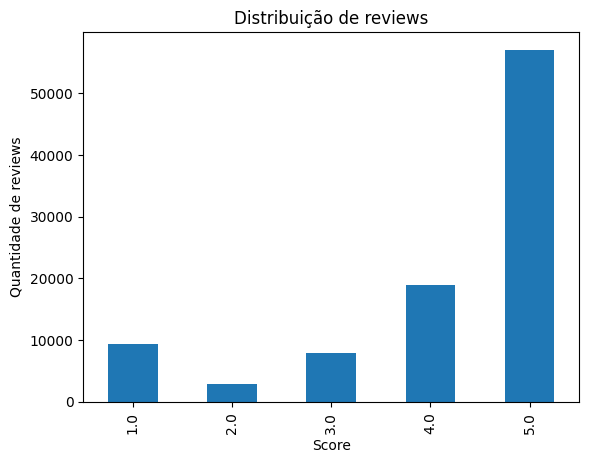

In [19]:
df["review_score"].value_counts().sort_index().plot(kind = "bar")
plt.title("Distribuição de reviews")
plt.xlabel("Score")
plt.ylabel("Quantidade de reviews")
plt.show()

#### Medindo a relção entre Delay x  Médias de Avaliações

In [20]:
def order_category(delay):
    if delay < 0:
        return "early"
    if delay == 0:
        return "on time"
    else:
        return "late"
    
df["order_category"] = df["delay_time_days"].apply(order_category)
# Criação de função que separa as categorias e aplicação no Dataset

In [21]:
df.groupby("order_category")["review_score"].mean().sort_values
# Aparecendo de forma ordenada

<bound method Series.sort_values of order_category
early      4.293718
late       2.271025
on time    4.033308
Name: review_score, dtype: float64>

#### Visualização clara do boxplot abaixo:

Observá-se que os pedidos entregues antecipadamente costumam receber medianas mais altas e menos variabilidade, enquanto os pedidos atrasados, mesmo que algumas vezes com avaliações positivas, aumentam muito mais a variabilidade (e decadência) das avaliações.

É sensato sugerir que cumprir prazos de entregas é uma condição necessária para garantir notas mais altas para a maioria dos clientes mesmo que nem sempre leve à avaliações máximas.

Esses resultados refoçam que o tempo de entrega influencia também a previsibilidade da experiência do cliente.

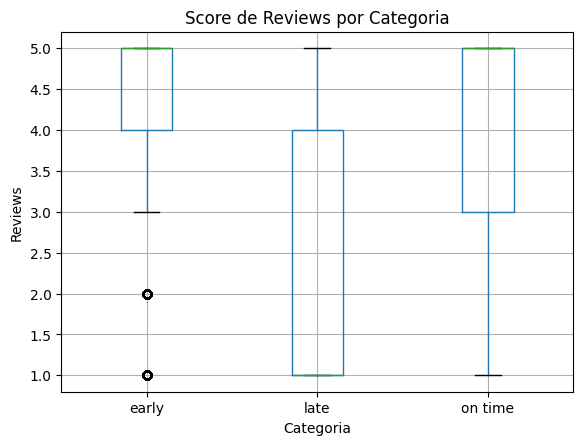

In [22]:
df.boxplot(column = "review_score", by = "order_category")
plt.title("Score de Reviews por Categoria")
plt.suptitle("")
plt.xlabel("Categoria")
plt.ylabel("Reviews")
plt.show()

#### Correlação entre dias de delays com notas de review abaixo: 

Revela correlação linear moderada, o que indica que o atraso não é o único fator isolado para as avaliações, mas é consistentemente uma questão.

In [23]:
df[["delay_time_days", "review_score"]].corr()

,delay_time_days,review_score
delay_time_days,1.000000,-0.267027
review_score,-0.267027,1.000000


#### Análise de atrasos por estados:

Essa análise traz o insight de que principalmente estados do norte, mais afastados dos centros comerciais tem maiores atrasos médios.

In [24]:
state_delay = (df.groupby("customer_state")["delay_time_days"].mean().sort_values())

state_delay.head()

customer_state
AC   -20.725000
RO   -20.102881
AP   -19.686567
AM   -19.554795
RR   -17.292683
Name: delay_time_days, dtype: float64

In [25]:
state_delay.tail()

customer_state
BA   -10.785212
ES   -10.500000
SE   -10.020896
MA    -9.640777
AL    -8.713217
Name: delay_time_days, dtype: float64

#### Preparação de NLP:

40% dos pedidos tem comentários textuais. pode ser forma muito efetiva de entender onde os problemas realmente estão, já que deixa o cliente expressar o que não foi positivo.

In [26]:
# Quantidade de comentários existentes
df["review_comment_message"].notna().mean()

np.float64(0.4030350828359055)

In [27]:
# Criando subset apenas de texto
nlp_df = df.dropna(subset = ["review_comment_message"]).copy()

In [29]:
nlp_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,delay_time_days,review_score,review_comment_message,customer_city,customer_state,order_category
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8.0,-8.0,4.0,"Não testei o produto ainda, mas ele veio corre...",sao paulo,SP,early
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13.0,-6.0,4.0,Muito bom o produto.,barreiras,BA,early
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13.0,-13.0,5.0,O produto foi exatamente o que eu esperava e e...,sao goncalo do amarante,RN,early
9,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07,12.0,-9.0,1.0,Aguardando retorno da loja,rio de janeiro,RJ,early
13,432aaf21d85167c2c86ec9448c4e42cc,3df704f53d3f1d4818840b34ec672a9f,delivered,2018-03-01 14:14:28,2018-03-01 15:10:47,2018-03-02 21:09:20,2018-03-12 23:36:26,2018-03-21,11.0,-9.0,4.0,Gostei do produto,sao paulo,SP,early


#### A análise do notebook evidencia a hipótese de que pedidos que chegam mais cedo, principalmente dentro do esperado costumam ser mais bem avaliados, enquanto atrasos impactam a experiência do cliente que pode ser simplificada à nota de avaliação do produto, e posteriormente extendida com o NLP. 

Embora a correlação numérica seja moderada, o padrão é consistente. O próximo passo seria entender como a insatisfação dos clientes etá expressada com os comentários de texto.

In [ ]:
# Salvando como dataset único para NLP
nlp_df.to_csv("../data/processed/olist_reviews_text.csv", index = False)